In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
filename = "auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type",
           "aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", 
           "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system",
           "bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv(filename, names=headers)

In [3]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [4]:
import seaborn as sns

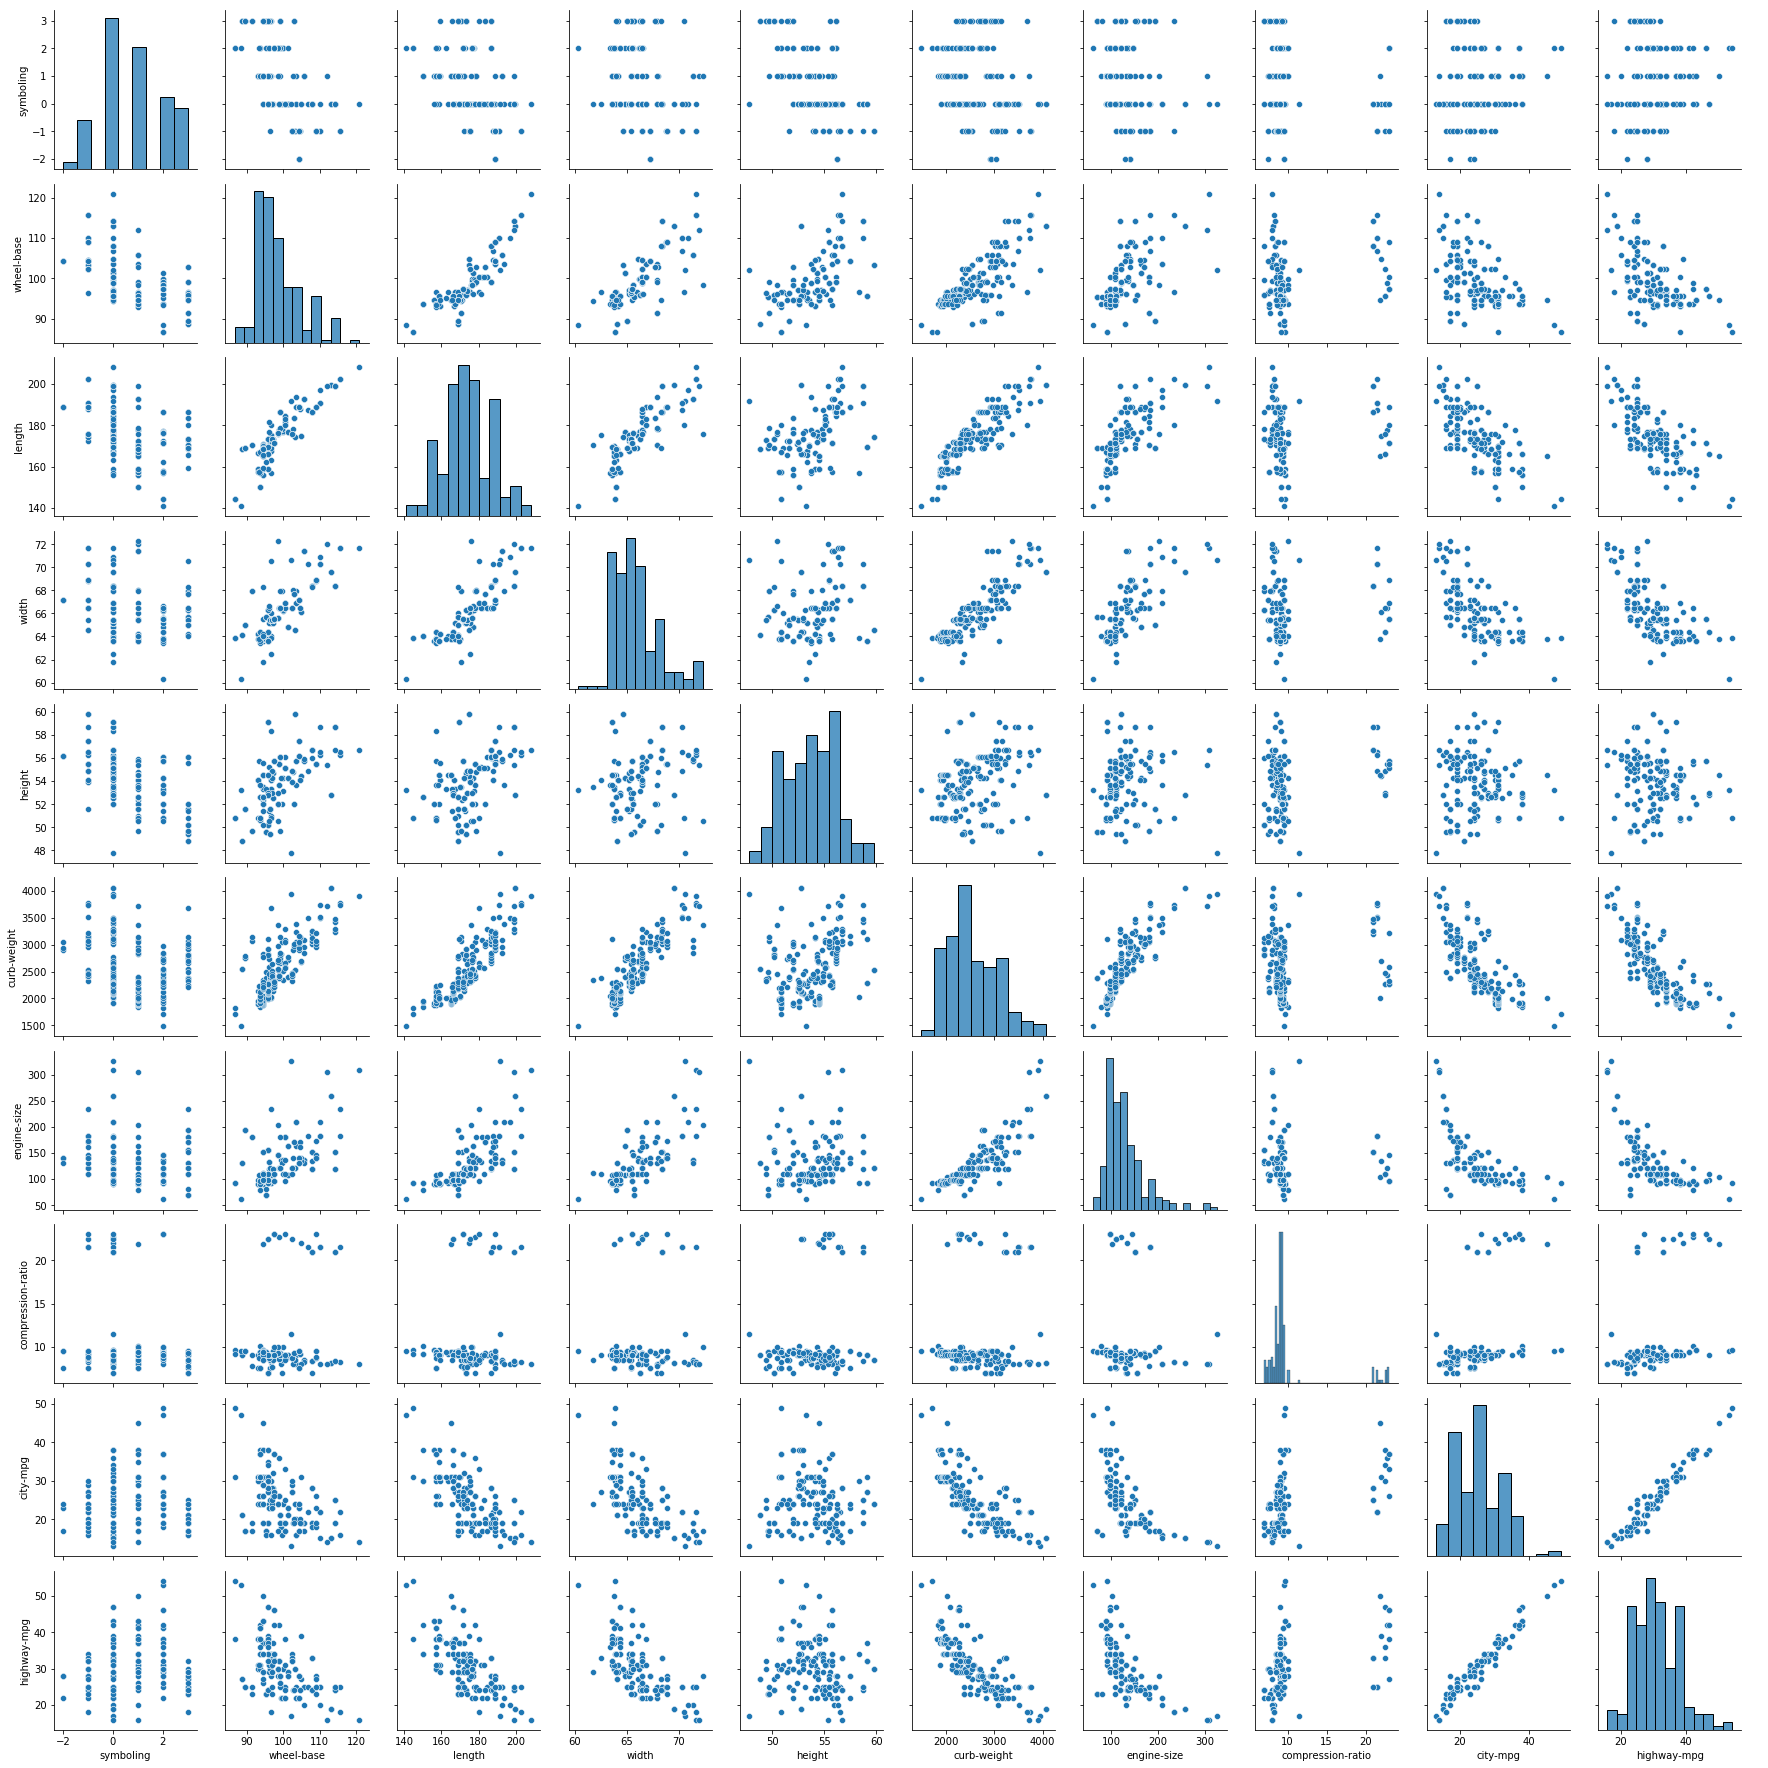

In [5]:
sns.pairplot(df)

### Clean missing Data

In [6]:
df.replace("?", np.nan, inplace = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


In [7]:
df.isnull().sum().sort_values(ascending=False)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
length                0
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
height                0
width                 0
highway-mpg           0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
compression-ratio     0
city-mpg              0
symboling             0
dtype: int64

In [8]:
avg_nl = df['normalized-losses'].astype(np.float64).mean(axis=0)

print('normalized-losses:', avg_nl)

df['normalized-losses'].replace(np.nan,avg_nl,inplace=True)
df['normalized-losses'] = df['normalized-losses'].astype(np.int64)

normalized-losses: 122.0


In [9]:
avg_bore = df['bore'].astype(np.float64).mean(axis=0)

print('bore:', avg_bore)

df['bore'].replace(np.nan,avg_bore,inplace=True)
df['bore'] = df['bore'].astype(np.float64)

bore: 3.3297512437810943


In [10]:
avg_stroke = df['stroke'].astype(np.float64).mean(axis=0)

print('stroke:', avg_stroke)

df['stroke'].replace(np.nan,avg_stroke,inplace=True)
df['stroke'] = df['stroke'].astype(np.float64)

stroke: 3.255422885572139


In [11]:
avg_horsepower = df['horsepower'].astype(np.float64).mean(axis=0)

print('horsepower:', avg_horsepower)

df['horsepower'].replace(np.nan,avg_horsepower,inplace=True)
df['horsepower'] = df['horsepower'].astype(np.float64)

horsepower: 104.25615763546799


In [12]:
avg_peak_rpm = df['peak-rpm'].astype(np.float64).mean(axis=0)

print('peak-rpm:', avg_peak_rpm)

df['peak-rpm'].replace(np.nan,avg_peak_rpm,inplace=True)
df['peak-rpm'] = df['peak-rpm'].astype(np.float64)

peak-rpm: 5125.369458128079


In [13]:
df.isnull().sum().sort_values(ascending=False)

price                4
num-of-doors         2
highway-mpg          0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
symboling            0
dtype: int64

In [14]:
print(df["num-of-doors"].value_counts())

four    114
two      89
Name: num-of-doors, dtype: int64


In [15]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [16]:
df.isnull().sum().sort_values(ascending=False)

price                4
highway-mpg          0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
symboling            0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [19]:
df.isnull().sum().sort_values(ascending=False)

price                0
highway-mpg          0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
symboling            0
dtype: int64

In [20]:
df.shape

(201, 26)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [22]:
df['diesel'] = np.where(df['fuel-type']=='diesel',1,0)
df['diesel'] = df['diesel'].astype(np.int64)

In [23]:
df['gas'] = np.where(df['fuel-type']=='gas',1,0)
df['gas'] = df['gas'].astype(np.int64)

In [24]:
df['price'] = df['price'].astype(np.int64)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [26]:
from scipy import stats

In [27]:
coef_wheel_base, p_value_wheel_base = stats.pearsonr(df['wheel-base'], 
                                                     df['price'])
coef_hp, p_value_hp = stats.pearsonr(df['horsepower'], df['price'])
coef_length, p_value_length = stats.pearsonr(df['length'], df['price'])
coef_width, p_value_width = stats.pearsonr(df['width'], df['price'])
coef_height, p_value_height = stats.pearsonr(df['height'], df['price'])
coef_curb_weight, p_value_curb_weight = stats.pearsonr(df['curb-weight'], 
                                                       df['price'])
coef_engine_size, p_value_engine_size = stats.pearsonr(df['engine-size'], 
                                                       df['price'])
coef_bore, p_value_bore = stats.pearsonr(df['bore'], df['price'])
coef_city_mpg, p_value_city_mpg = stats.pearsonr(df['city-mpg'], 
                                                 df['price'])
coef_highway_mpg, p_value_highway_mpg = stats.pearsonr(df['highway-mpg'], 
                                                       df['price'])
coef_symboling, p_value_symboling = stats.pearsonr(df['symboling'], 
                                                   df['price'])
coef_normalized_losses, p_value_normalized_losses = stats.pearsonr(df['normalized-losses'], 
                                                   df['price'])
coef_diesel, p_value_diesel = stats.pearsonr(df['diesel'], df['price'])
coef_gas, p_value_gas = stats.pearsonr(df['gas'], df['price'])
coef_stroke, p_value_stroke = stats.pearsonr(df['stroke'], df['price'])
coef_compression_ratio, p_value_compression_ratio = stats.pearsonr(df['compression-ratio'], 
                                           df['price'])
coef_peak_rpm, p_value_peak_rpm = stats.pearsonr(df['peak-rpm'],
                                                 df['price'])

pd.DataFrame({'':['wheel-base vs price','horsepower vs price',
                  'length vs price','width vs price','height vs price',
                  'curb-weight vs price', 'engine-size vs price',
                 'bore vs price','city-mpg vs price',
                 'highway-mpg vs price','symboling vs price',
                  'normalized-losses vs price',
                 'diesel vs price',
                  'gas vs price','stroke vs price',
                 'compression-ratio vs price','peak-rpm vs price'],
              'Pearson Correlation Coefficient':[coef_wheel_base,coef_hp,
                                                 coef_length,coef_width,
                                                 coef_height,
                                                coef_curb_weight,
                                                coef_engine_size,coef_bore,
                                                coef_city_mpg,
                                                coef_highway_mpg,
                                                coef_symboling,
                                                coef_normalized_losses,
                                                 coef_diesel,coef_gas,
                                                coef_stroke,
                                                 coef_compression_ratio,
                                                coef_peak_rpm],
              'P-value':[p_value_wheel_base,p_value_hp,p_value_length,
                        p_value_width,p_value_height,p_value_curb_weight,
                         p_value_engine_size,p_value_bore,
                         p_value_city_mpg,p_value_highway_mpg,
                         p_value_symboling,p_value_normalized_losses,
                        p_value_diesel,p_value_gas,
                        p_value_stroke,p_value_compression_ratio,
                        p_value_peak_rpm],
              'Significant of correlation':['Yes','Yes','Yes','Yes','Yes',
                                           'Yes','Yes','Yes','Yes','Yes',
                                            'No','Yes','No',
                                           'No','No','No','No']
    
})


,,Pearson Correlation Coefficient,P-value,Significant of correlation
0,wheel-base vs price,0.584642,8.076488e-20,Yes
1,horsepower vs price,0.809575,6.369057e-48,Yes
2,length vs price,0.690628,8.016477e-30,Yes
3,width vs price,0.751265,9.200336e-38,Yes
4,height vs price,0.135486,5.514627e-02,Yes
5,curb-weight vs price,0.834415,2.189577e-53,Yes
6,engine-size vs price,0.872335,9.265492e-64,Yes
7,bore vs price,0.543155,8.049189e-17,Yes
8,city-mpg vs price,-0.686571,2.321132e-29,Yes
9,highway-mpg vs price,-0.704692,1.749547e-31,Yes


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

regr = AdaBoostRegressor(random_state=0, n_estimators=100)

X=df[['highway-mpg','horsepower','curb-weight',
      'engine-size','wheel-base',
     'normalized-losses',
     'length','width','bore',
     'city-mpg','symboling','height','bore',
     'stroke','diesel']]
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,
                                                    test_size=0.33)

clf = regr.fit(X_train, y_train)
yhat = clf.predict(X_test)
clf.score(X_test, y_test)
print('Score:',clf.score(X_test, y_test))
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Score: 0.8923459285852271
MAE: 1839.157


In [29]:
from sklearn.ensemble import GradientBoostingRegressor

X=df[['highway-mpg','horsepower','curb-weight',
      'engine-size','wheel-base',
     'normalized-losses',
     'length','width','bore',
     'city-mpg','symboling','height','bore',
     'stroke','diesel']]
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,
                                                   test_size=0.33)

clf = GradientBoostingRegressor().fit(X_train, y_train)
yhat = clf.predict(X_test)
clf.score(X_test, y_test)
print('Score:',clf.score(X_test, y_test))
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Score: 0.9022541989739475
MAE: 1513.184
